In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Single harmonic oscillator

In [17]:
freq = 2.  # Hz
omega = 2. * np.pi * freq

tmax = 10  # s
Nt = 10000
sfreq = Nt / tmax

tv = np.linspace(0., tmax, Nt)

def f(X, t):
    x, dotx = X
    ddotx = -omega**2 * x
    return [dotx, ddotx]

In [3]:
%%time
X = odeint(f, [1., 0.], tv)

CPU times: user 11.3 ms, sys: 1.47 ms, total: 12.8 ms
Wall time: 12.2 ms


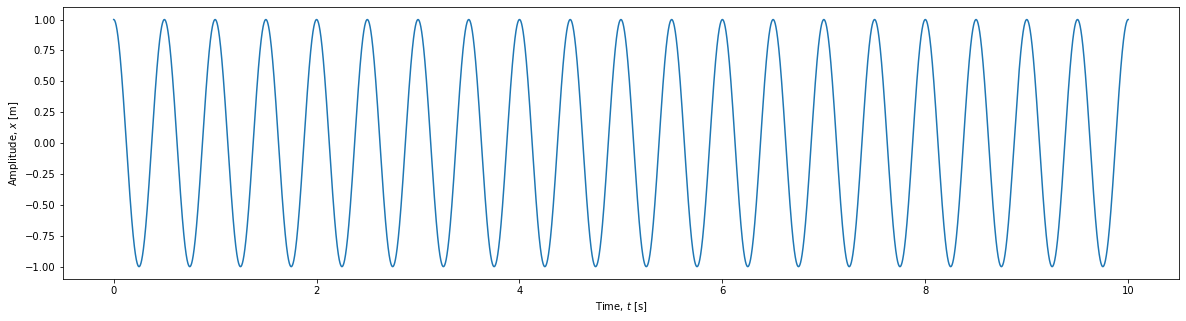

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(tv, X[:, 0], "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# Phase model

In [5]:
def fp(p, t):
    dotp = omega * Nt
    return dotp

In [6]:
%%time
Phi = odeint(fp, np.pi/2, tv)

CPU times: user 752 µs, sys: 492 µs, total: 1.24 ms
Wall time: 832 µs


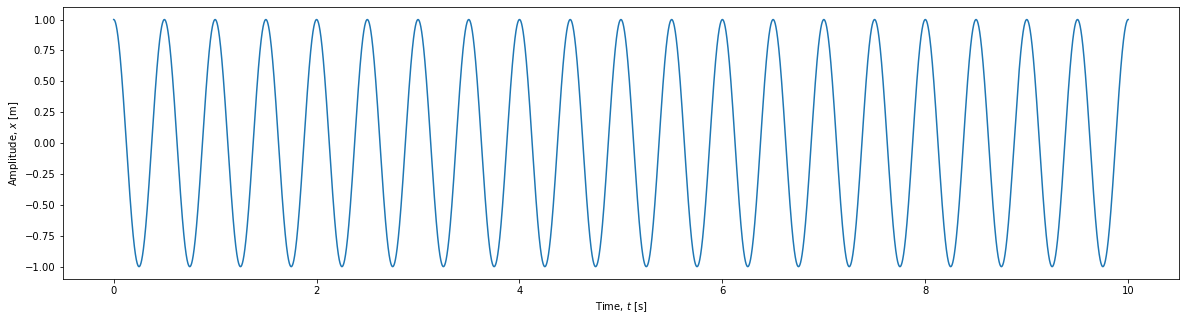

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# Two oscillators

In [8]:
N_osc = 2

Omega = omega + np.random.randn(N_osc) / Nt
Noise = np.ones(N_osc) / Nt
Coupling = 0.5 * np.ones(N_osc)

In [9]:
def fp(p, t):
    C = np.sin(np.array([p[1]-p[0], p[0]-p[1]]))
    dotp = Omega * Nt * np.ones(N_osc) + Noise * np.random.randn(N_osc) + Coupling * C
    return dotp

In [10]:
%%time
Phi = odeint(fp, 2 * np.pi * np.random.rand(N_osc), tv)

CPU times: user 6.9 ms, sys: 1.59 ms, total: 8.49 ms
Wall time: 7.52 ms


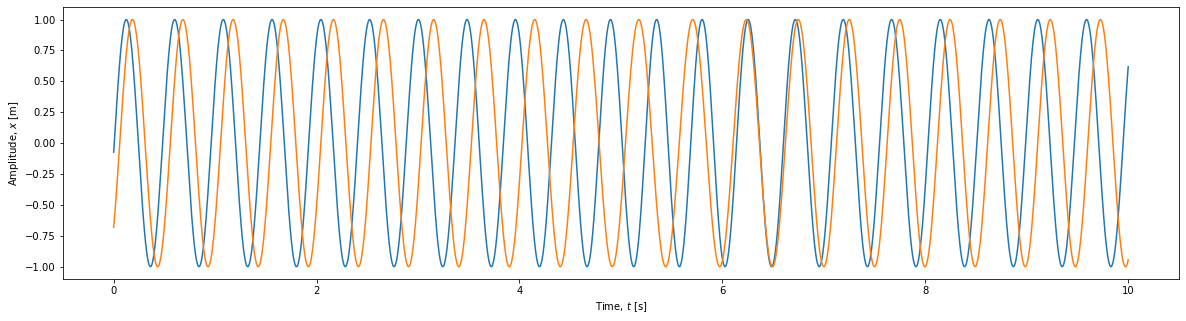

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# N oscillators with uniform coupling

In [12]:
N_osc = 10

Omega = omega + np.random.randn(N_osc) / Nt
Noise = np.ones(N_osc) * 1 / Nt
Coupling = 0.3 * np.ones(N_osc)

In [13]:
def fp(p, t):
    p = np.atleast_2d(p)
    C = np.sum(np.sin(p).T.dot(np.cos(p)) - np.cos(p).T.dot(np.sin(p)), 0)
    dotp = Omega * Nt * np.ones(N_osc) + Noise * np.random.randn(N_osc) + Coupling * C
    return dotp

In [14]:
%%time
Phi = odeint(fp, 2 * np.pi * np.random.rand(N_osc), tv)

CPU times: user 20.1 ms, sys: 2.79 ms, total: 22.9 ms
Wall time: 21.5 ms


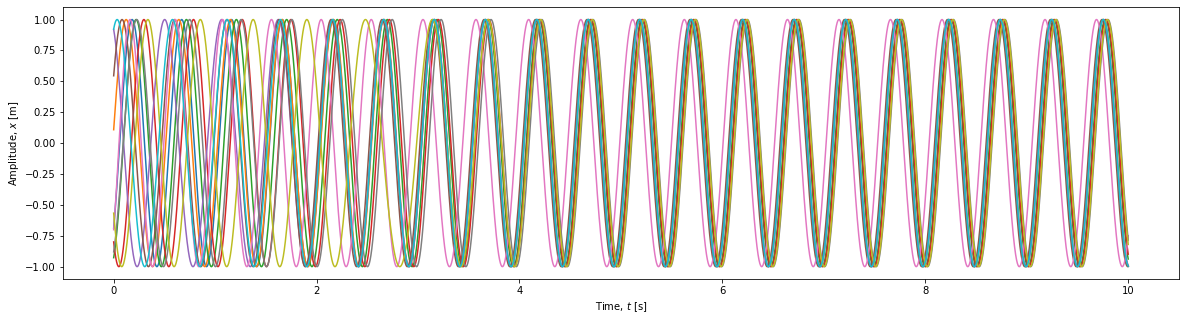

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# N oscillators with generalized coupling

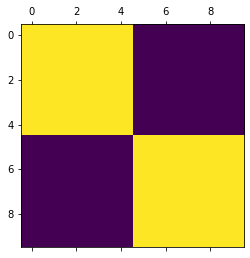

In [44]:
frequency_mean = 2.  # Hz
frequency_std = 0.1 # Hz

noise_phase_level = 0.005 / sfreq
noise_amplitude_level = 0.

N = int(N_osc/2)
A11 = 1 * np.ones((N, N))
A12 = 0 * np.ones((N, N))
A21 = 0 * np.ones((N, N))
A22 = 1 * np.ones((N, N))
W = np.block([[A11, A12], [A21, A22]])
W = 0.5 * W
plt.matshow(W)

In [45]:
freq = frequency_mean + frequency_std * np.random.randn(N_osc)
omega = 2. * np.pi * freq

def fp(p, t):
    p = np.atleast_2d(p)
    coupling = np.squeeze((np.sin(p) * np.matmul(W, np.cos(p).T).T) - (np.cos(p) * np.matmul(W, np.sin(p).T).T))
    dotp = omega - coupling + noise_phase_level * np.random.randn(N_osc)
    return dotp

In [46]:
%%time
p0 = 2 * np.pi * np.block([np.zeros(N), np.zeros(N) + np.random.rand(N) + 0.5])
Phi = odeint(fp, p0, tv) % (2*np.pi)

CPU times: user 229 ms, sys: 3.87 ms, total: 233 ms
Wall time: 231 ms


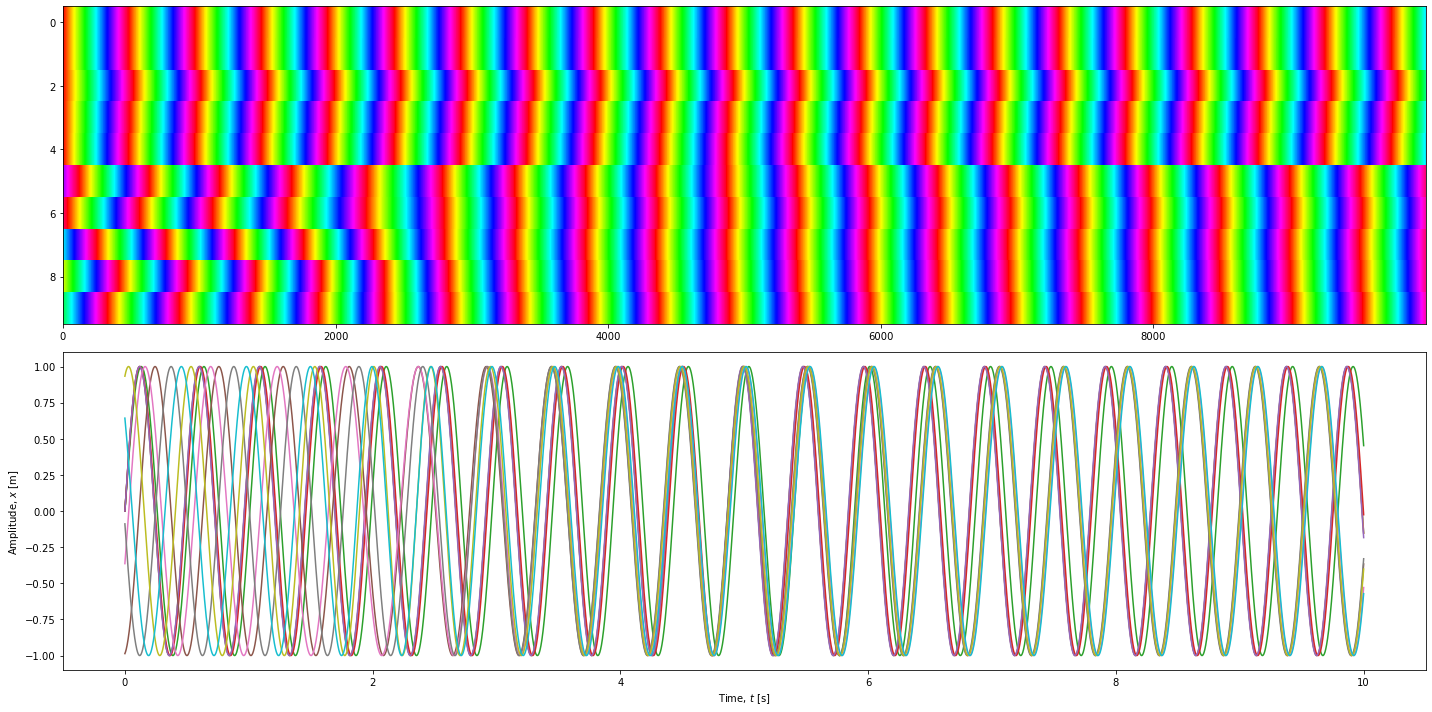

In [47]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
plt.imshow(Phi.T,interpolation='none', cmap='hsv', aspect='auto')
plt.subplot(2,1,2)
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.tight_layout()
plt.show()